## Решающие деревья

### О задании

Задание состоит из двух разделов:
1. В первом разделе вы научитесь применять деревья из sklearn для задачи классификации. Вы посмотрите какие разделяющие поверхности деревья строят для различных датасетов и проанализируете их зависимость от различных гиперпараметров.
2. Во втором разделе вы попробуете реализовать свое решающее дерево и сравните его со стандартное имплиментацией из sklearn. Вы также протестируете деревья на более сложных датасетах и сравните различные подходы к кодированию категориальных признаков.

### Оценивание и штрафы
Каждая из задач имеет определенную «стоимость» (указана в скобках около задачи). Максимально допустимая оценка за работу — 10 баллов.

Сдавать задание после указанного срока сдачи нельзя. При выставлении неполного балла за задание в связи с наличием ошибок на усмотрение проверяющего предусмотрена возможность исправить работу на указанных в ответном письме условиях.

Задание выполняется самостоятельно. «Похожие» решения считаются плагиатом и все задействованные студенты (в том числе те, у кого списали) не могут получить за него больше 0 баллов. Если вы нашли решение какого-то из заданий (или его часть) в открытом источнике, необходимо указать ссылку на этот источник в отдельном блоке в конце вашей работы (скорее всего вы будете не единственным, кто это нашел, поэтому чтобы исключить подозрение в плагиате, необходима ссылка на источник).

Неэффективная реализация кода может негативно отразиться на оценке



### Формат сдачи
Решение должно содержать:
* Ноутбук homework-practice-05-Username.ipynb
* Модуль hw5code.py

Для удобства проверки самостоятельно посчитайте свою максимальную оценку (исходя из набора решенных задач) и укажите ниже:

__Оценка:__

# 1. Решающие деревья. Визуализация.

В этой части мы рассмотрим два простых двумерных датасета сделанных с помощью `make_moons`, `make_circles` и посмотрим как ведет себя разделяющая поверхность в зависимости от различных гиперпараметров.

In [27]:
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.colors import ListedColormap
from sklearn.datasets import make_moons, make_circles, make_classification
datasets = [
    make_circles(noise=0.2, factor=0.5, random_state=42),
    make_moons(noise=0.2, random_state=42),
    make_classification(n_classes=3, n_clusters_per_class=1, n_features=2, class_sep=.8, random_state=3,
                        n_redundant=0, )
]

In [28]:
palette = sns.color_palette(n_colors=3)
cmap = ListedColormap(palette)

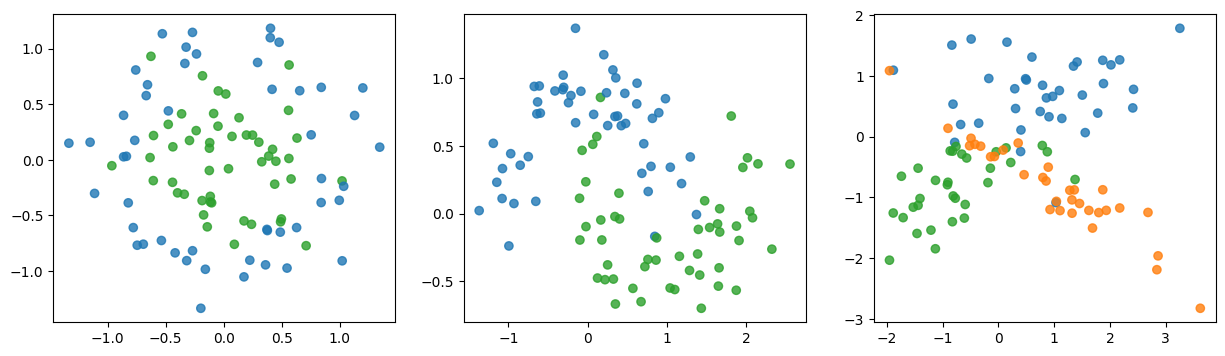

In [29]:
plt.figure(figsize=(15, 4))
for i, (x, y) in enumerate(datasets):
    plt.subplot(1, 3, i + 1)
    plt.scatter(x[:, 0], x[:, 1], c=y, cmap=cmap, alpha=.8)

__1. (1 балл)__

Для каждого датасета обучите решающее дерево с параметрами по умолчанию, предварительно разбив выборку на обучающую и тестовую. Постройте разделящие поверхности (для этого воспользуйтесь функцией `plot_surface`, пример ниже). Посчитайте accuracy на обучающей и тестовой выборках. Сильно ли деревья переобучились?

In [13]:
def plot_surface(clf, X, y):
    plot_step = 0.01
    palette = sns.color_palette(n_colors=len(np.unique(y)))
    cmap = ListedColormap(palette)
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step),
                         np.arange(y_min, y_max, plot_step))
    plt.tight_layout(h_pad=0.5, w_pad=0.5, pad=2.5)

    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    cs = plt.contourf(xx, yy, Z, cmap=cmap, alpha=0.3)

    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap, alpha=.7,
                edgecolors=np.array(palette)[y], linewidths=2)

In [8]:
# Пример: Он не компилится поэтому я его закоментил
#from sklearn.linear_model import LinearRegression
#X, y = datasets[2]
#lr  = LinearRegression().fit(X, y)
#plot_surface(lr, X, y) он не 

NameError: name 'datasets' is not defined

Dataset 1: Train Accuracy = 1.00, Test Accuracy = 0.73
Dataset 2: Train Accuracy = 1.00, Test Accuracy = 0.87
Dataset 3: Train Accuracy = 1.00, Test Accuracy = 0.83


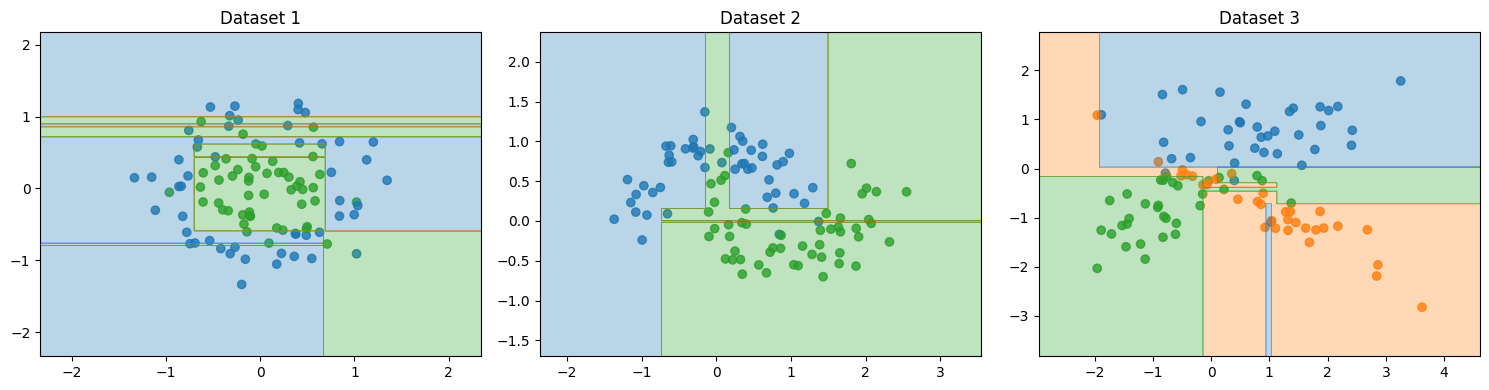

In [31]:
### ╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.colors import ListedColormap
from sklearn.datasets import make_moons, make_circles, make_classification
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

# Функция для построения разделяющей поверхности
def plot_surface(clf, X, y):
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                         np.arange(y_min, y_max, 0.01))
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, alpha=0.3, cmap=cmap)

# Создание датасетов
datasets = [
    make_circles(noise=0.2, factor=0.5, random_state=42),
    make_moons(noise=0.2, random_state=42),
    make_classification(n_classes=3, n_clusters_per_class=1, n_features=2, class_sep=.8, random_state=3,
                        n_redundant=0)
]

palette = sns.color_palette(n_colors=3)
cmap = ListedColormap(palette)

# Обучение и визуализация для каждого датасета
plt.figure(figsize=(15, 4))
for i, (X, y) in enumerate(datasets):
    # Разделение на обучающую и тестовую выборки
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
    
    # Обучение решающего дерева
    clf = DecisionTreeClassifier(random_state=42)
    clf.fit(X_train, y_train)
    
    # Предсказания
    y_train_pred = clf.predict(X_train)
    y_test_pred = clf.predict(X_test)
    
    # Вычисление accuracy
    train_accuracy = accuracy_score(y_train, y_train_pred)
    test_accuracy = accuracy_score(y_test, y_test_pred)
    
    print(f"Dataset {i+1}: Train Accuracy = {train_accuracy:.2f}, Test Accuracy = {test_accuracy:.2f}")
    
    # Визуализация
    plt.subplot(1, 3, i + 1)
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap, alpha=.8)
    plot_surface(clf, X, y)
    plt.title(f'Dataset {i+1}')

plt.tight_layout()
plt.show()

__Ответ:__ Да модели достаточно сильно переобучились
модель демонстрирует идеальную точность на тестовой выборке что указывает на переобучение
Снижение точности на тестовой вызвано тем тчо модель не умеет обобщать новые данные(что типично для машинного обучения)

__2. (1.5 балла)__

Попробуйте перебрать несколько параметров для регуляризации (напр. `max_depth`, `min_samples_leaf`). Для каждого набора гиперпараметров постройте разделяющую поверхность, выведите обучающую и тестовую ошибки. Можно делать кросс-валидацию или просто разбиение на трейн и тест, главное делайте каждый раз одинаковое разбиение, чтобы можно было корректно сравнивать (помните же, что итоговое дерево сильно зависит от небольшого изменения обучающей выборки?). Проследите как меняется разделяющая поверхность и обобщающая способность. Почему так происходит, одинаково ли изменение для разных датасетов?

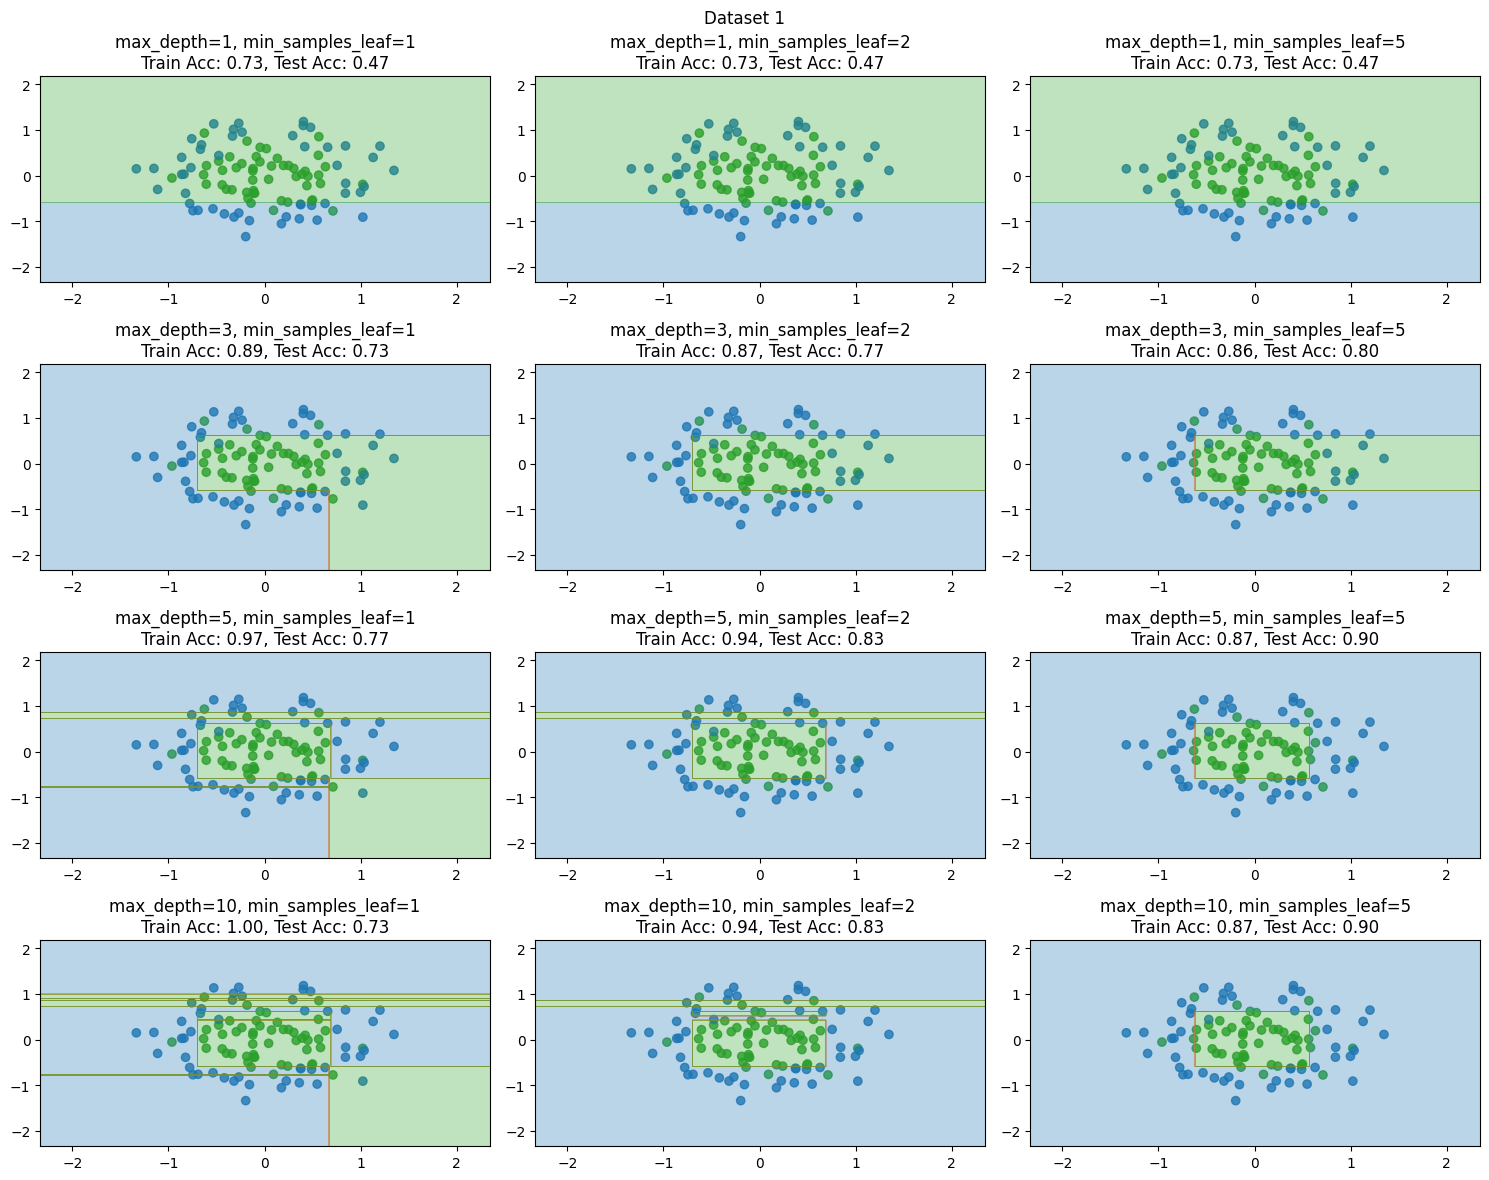

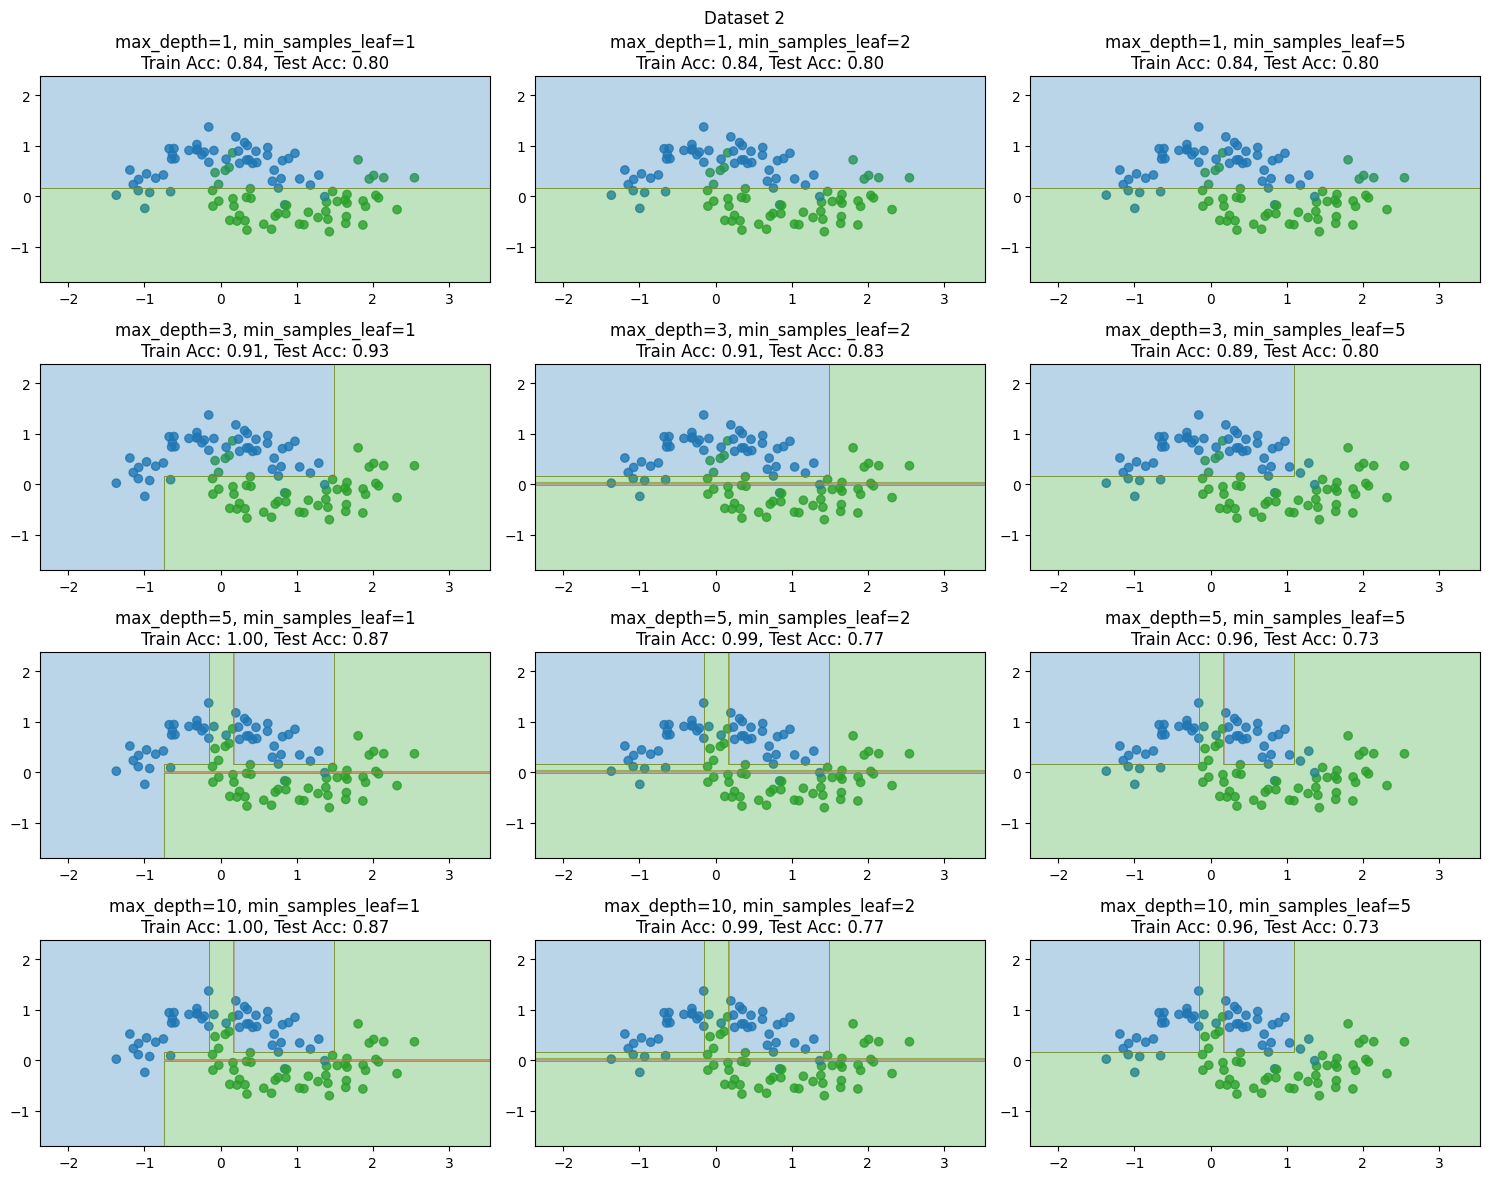

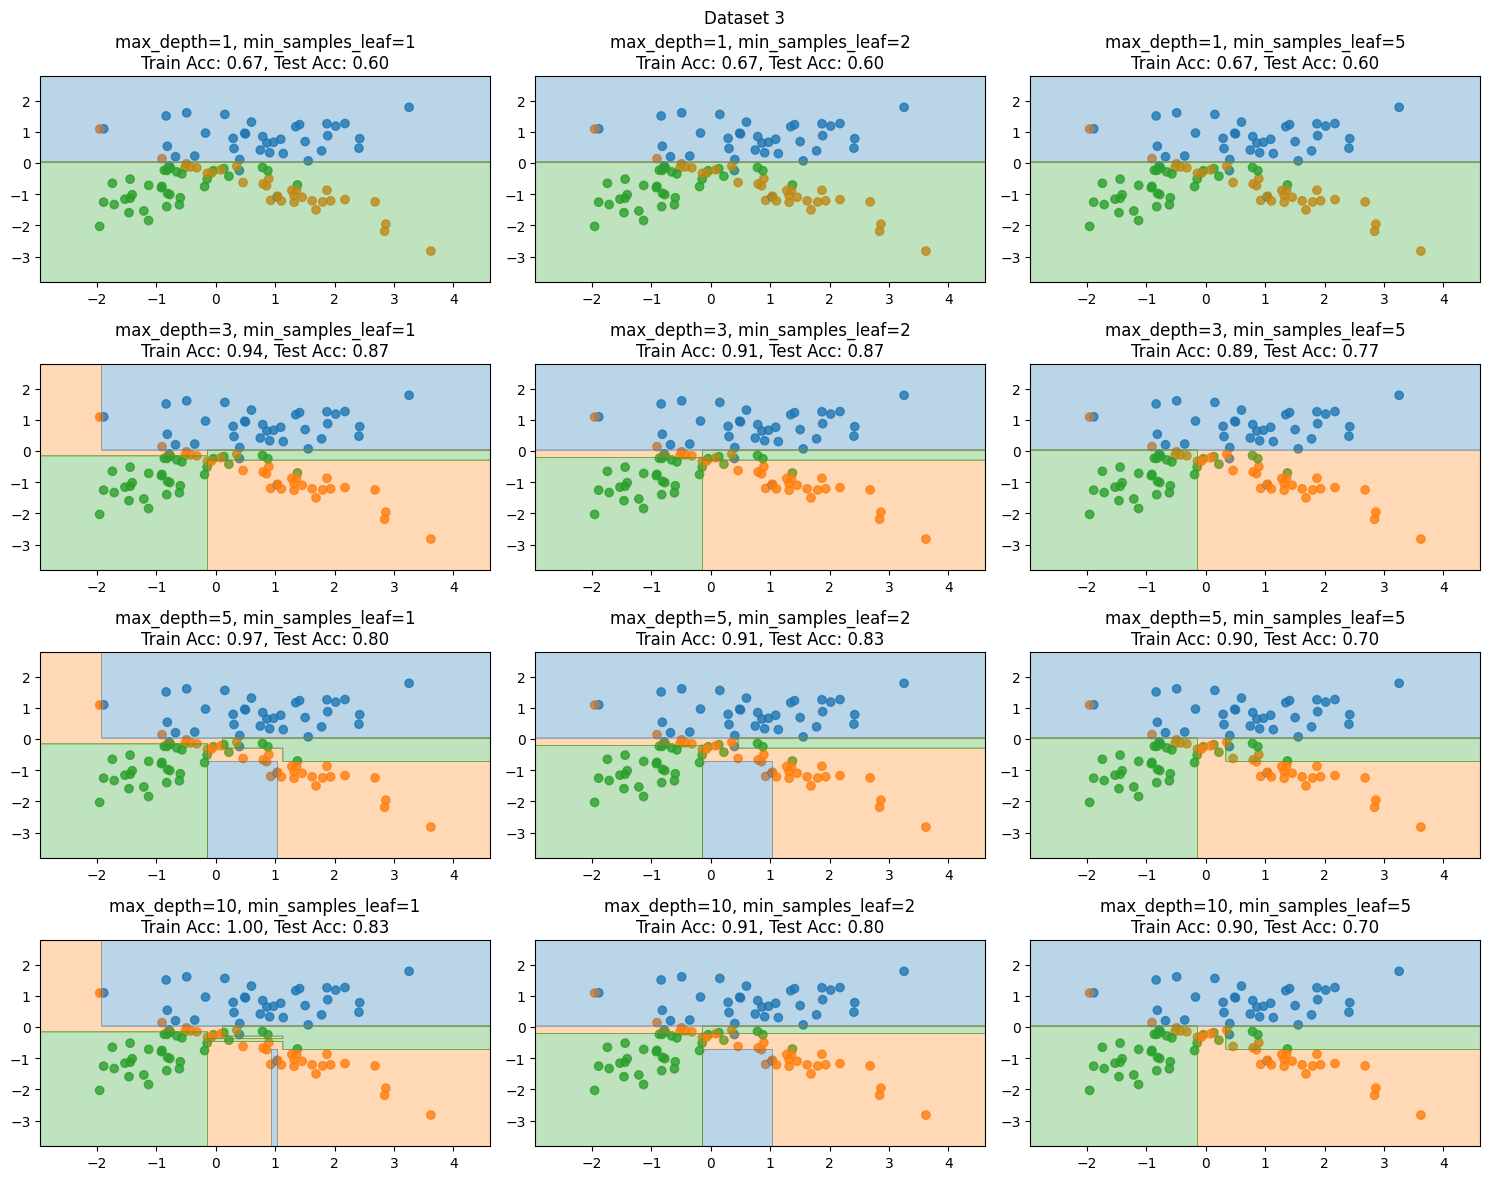

In [33]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.colors import ListedColormap
from sklearn.datasets import make_moons, make_circles, make_classification
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

# Функция для построения разделяющей поверхности
def plot_surface(clf, X, y):
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                         np.arange(y_min, y_max, 0.01))
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, alpha=0.3, cmap=cmap)

# Создание датасетов
datasets = [
    make_circles(noise=0.2, factor=0.5, random_state=42),
    make_moons(noise=0.2, random_state=42),
    make_classification(n_classes=3, n_clusters_per_class=1, n_features=2, class_sep=.8, random_state=3,
                        n_redundant=0)
]

# Гиперпараметры для перебора
max_depths = [1, 3, 5, 10]
min_samples_leaves = [1, 2, 5]

palette = sns.color_palette(n_colors=3)
cmap = ListedColormap(palette)

# Перебор гиперпараметров для каждого датасета
for i, (X, y) in enumerate(datasets):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
    
    plt.figure(figsize=(15, 12))
    
    for j, max_depth in enumerate(max_depths):
        for k, min_samples_leaf in enumerate(min_samples_leaves):
            # Обучение решающего дерева с гиперпараметрами
            clf = DecisionTreeClassifier(max_depth=max_depth, min_samples_leaf=min_samples_leaf, random_state=42)
            clf.fit(X_train, y_train)
            
            # Предсказания
            y_train_pred = clf.predict(X_train)
            y_test_pred = clf.predict(X_test)
            
            # Вычисление accuracy
            train_accuracy = accuracy_score(y_train, y_train_pred)
            test_accuracy = accuracy_score(y_test, y_test_pred)
            
            # Визуализация
            plt.subplot(len(max_depths), len(min_samples_leaves), j * len(min_samples_leaves) + k + 1)
            plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap, alpha=.8)
            plot_surface(clf, X, y)
            plt.title(f'max_depth={max_depth}, min_samples_leaf={min_samples_leaf}\nTrain Acc: {train_accuracy:.2f}, Test Acc: {test_accuracy:.2f}')
            plt.axis('tight')

    plt.suptitle(f'Dataset {i+1}')
    plt.tight_layout()
    plt.show()

__Ответ__ Поверхность во 1 и 3 датасетах стремится к тому чтобы стать единой фигурой при увеличении параметров но этого не происходит в 2


# 2. Решающие деревья своими руками

В этой части вам нужно реализовать свой класс для обучения решающего дерева в задаче бинарной классификации с возможностью обработки вещественных и категориальных признаков.

__3. (1.5 балл)__

Реализуйте функцию find_best_split из модуля hw5code.py

__4. (0.5 балла)__

Загрузите таблицу [students.csv](https://drive.google.com/file/d/0B2zoFVYw1rN3a0d0Zm43TzQ4aUU/view?usp=sharing) (это немного преобразованный датасет [User Knowledge](https://archive.ics.uci.edu/ml/datasets/User+Knowledge+Modeling)). В ней признаки объекта записаны в первых пяти столбцах, а в последнем записана целевая переменная (класс: 0 или 1). Постройте на одном изображении пять кривых "порог — значение критерия Джини" для всех пяти признаков. Отдельно визуализируйте scatter-графики "значение признака — класс" для всех пяти признаков.

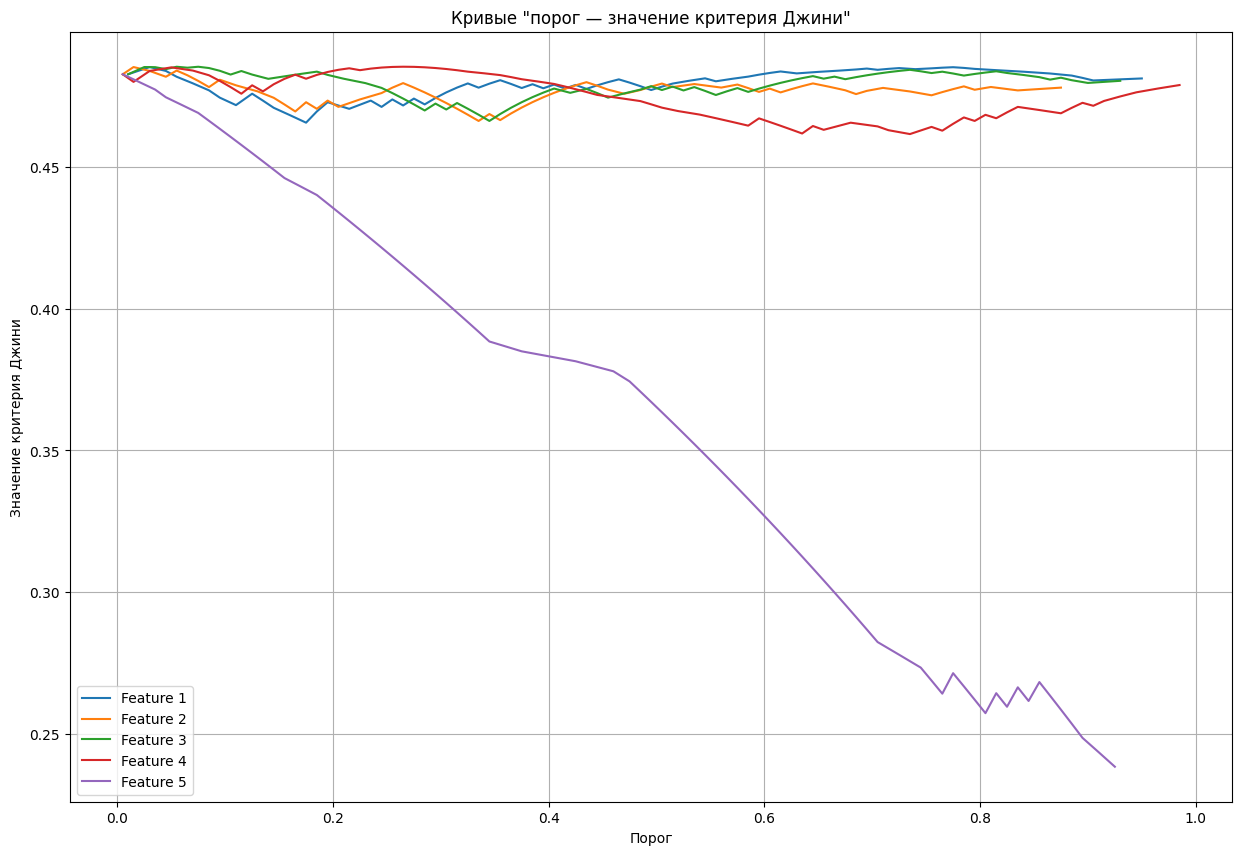

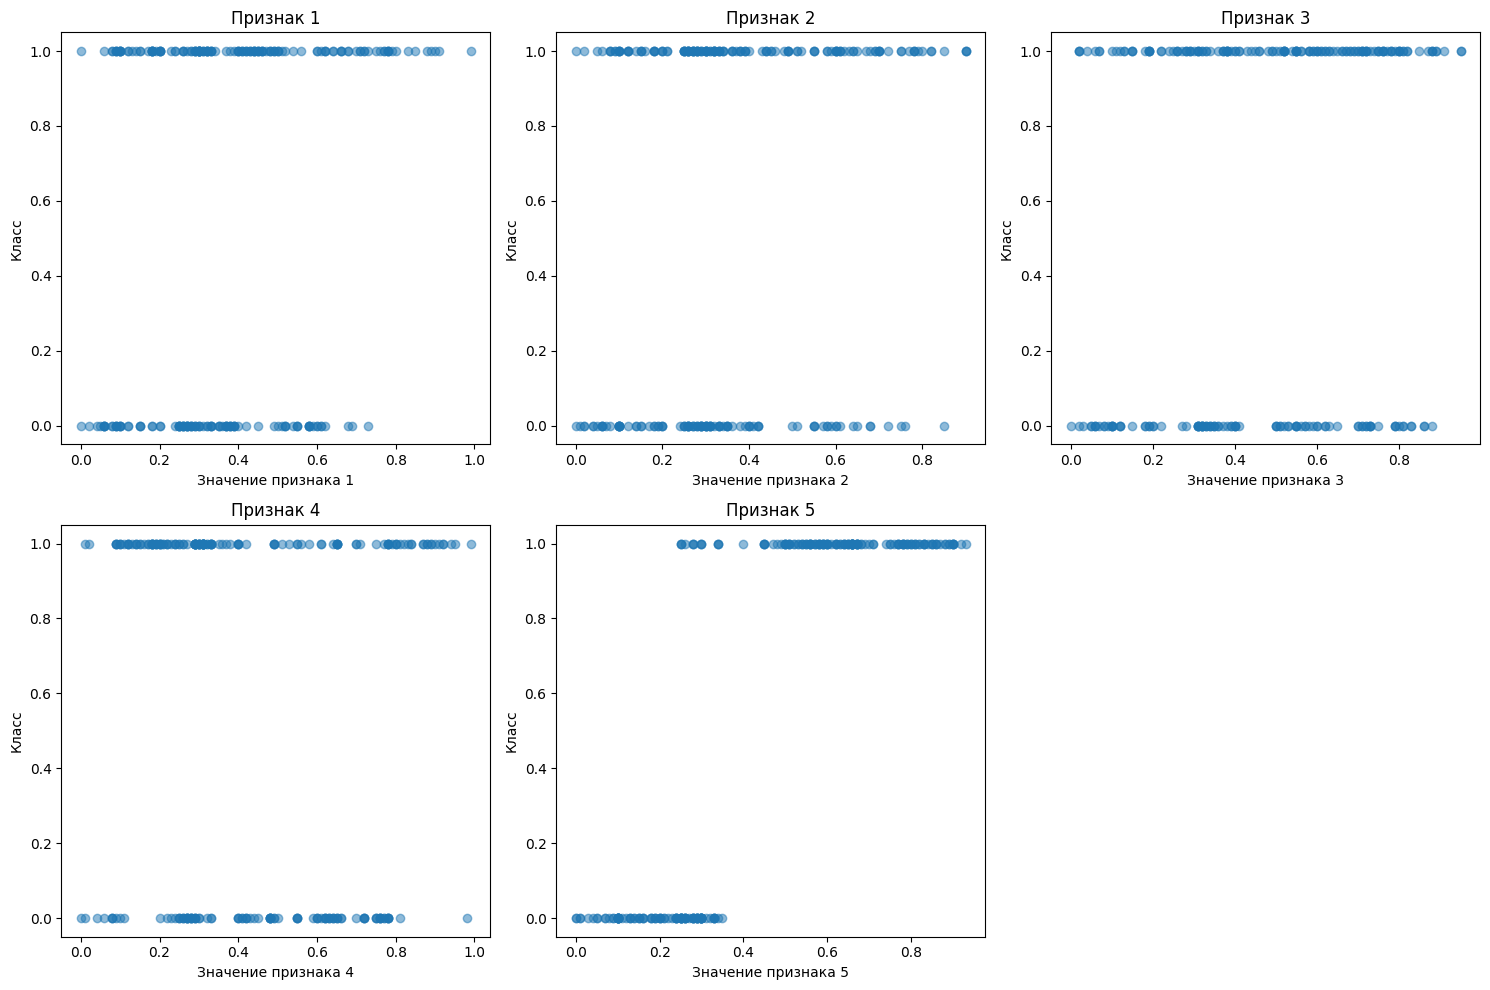

In [70]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Загрузка данных
data = pd.read_csv('students.csv')

# Разделение на признаки и целевую переменную
X = data.iloc[:, :-1].values  # Признаки (первые 5 столбцов)
y = data.iloc[:, -1].values    # Целевая переменная (последний столбец)
def gini_index(y):
    total_count = len(y)
    if total_count == 0:
        return 0  # Чтобы избежать деления на ноль
    
    p0 = np.sum(y == 0) / total_count
    p1 = np.sum(y == 1) / total_count
    
    # Используем формулу для критерия Джини
    gini = 1 - (p0**2 + p1**2)
    
    return gini

def find_best_split(feature_vector, target_vector):
    # Сортируем по значению признака
    sorted_indices = np.argsort(feature_vector)
    sorted_feature = feature_vector[sorted_indices]
    sorted_target = target_vector[sorted_indices]

    # Находим уникальные значения признака
    unique_values = np.unique(sorted_feature)
    thresholds = (unique_values[:-1] + unique_values[1:]) / 2  # Пороги как средние между соседними значениями

    # Инициализация переменных для хранения значений Джини
    gini_best = float('inf')
    threshold_best = None
    ginis = []

    # Подсчет общего количества объектов
    total_count = len(target_vector)

    # Подсчет количества объектов каждого класса
    total_count_0 = np.sum(target_vector == 0)
    total_count_1 = np.sum(target_vector == 1)

    # Инициализация счетчиков для левой и правой части
    left_count_0 = 0
    left_count_1 = 0

    # Проходим по всем порогам
    for i in range(len(thresholds)):
        threshold = thresholds[i]

        # Обновляем счетчики для левой части
        left_count_0 += (sorted_target[i] == 0)
        left_count_1 += (sorted_target[i] == 1)

        # Количество объектов в левой и правой частях
        left_count = i + 1
        right_count = total_count - left_count

        # Пропускаем, если нет возможности разбить
        if right_count == 0:
            continue

        # Вычисляем Джини для левой и правой частей
        gini_left = gini_index(sorted_target[:left_count])
        gini_right = gini_index(sorted_target[left_count:])

        # Общий критерий Джини
        gini = (left_count / total_count) * gini_left + (right_count / total_count) * gini_right
        ginis.append(gini)

        # Проверяем, является ли это наилучшим значением
        if gini < gini_best:
            gini_best = gini
            threshold_best = threshold

    return thresholds, np.array(ginis), threshold_best, gini_best

# Визуализация кривых "порог — значение критерия Джини"
plt.figure(figsize=(15, 10))

for i in range(X.shape[1]):
    thresholds, ginis, _, _ = find_best_split(X[:, i], y)
    plt.plot(thresholds, ginis, label=f'Feature {i + 1}')

plt.title('Кривые "порог — значение критерия Джини"')
plt.xlabel('Порог')
plt.ylabel('Значение критерия Джини')
plt.legend()
plt.grid()
plt.show()

# Визуализация scatter-графиков "значение признака — класс"
plt.figure(figsize=(15, 10))

for i in range(X.shape[1]):
    plt.subplot(2, 3, i + 1)
    plt.scatter(X[:, i], y, alpha=0.5)
    plt.title(f'Признак {i + 1}')
    plt.xlabel(f'Значение признака {i + 1}')
    plt.ylabel('Класс')

plt.tight_layout()
plt.show()

__5. (0.5 балла)__

Исходя из кривых значений критерия Джини, по какому признаку нужно производить деление выборки на два поддерева? Согласуется ли этот результат с визуальной оценкой scatter-графиков? Как бы охарактеризовали вид кривой для "хороших" признаков, по которым выборка делится почти идеально? Чем отличаются кривые для признаков, по которым деление практически невозможно?

**Ответ:** По пятому признаку 
Да согласуется
на ней должны быть точки более менее четко делиться на две группы не пересекаясь в остальных признаках у нас огромные пересечения
КРивые у плохих признаков находятся в диапазоне 0.45 - 0.5

__6. (1.5 балла).__

Разберитесь с уже написанным кодом в классе DecisionTree модуля hw5code.py. Найдите ошибки в реализации метода \_fit_node. Напишите функцию \_predict_node.

 Построение дерева осуществляется согласно базовому жадному алгоритму, предложенному в [лекции](https://github.com/esokolov/ml-course-hse/blob/master/2016-fall/lecture-notes/lecture07-trees.pdf) в разделе «Построение дерева». Выбор лучшего разбиения необходимо производить по критерию Джини. Критерий останова: все объекты в листе относятся к одному классу или ни по одному признаку нельзя разбить выборку. Ответ в листе: наиболее часто встречающийся класс в листе. Для категориальных признаков выполняется преобразование, описанное в лекции в разделе «Учет категориальных признаков».

__7. (0.5 балла)__

Протестируйте свое решающее дерево на датасете [mushrooms](https://archive.ics.uci.edu/ml/datasets/Mushroom). Вам нужно скачать таблицу agaricus-lepiota.data (из [Data Folder](https://archive.ics.uci.edu/ml/machine-learning-databases/mushroom/)), прочитать ее с помощью pandas, применить к каждому столбцу LabelEncoder (из sklearn), чтобы преобразовать строковые имена категорий в натуральные числа. Первый столбец — это целевая переменная (e — edible, p — poisonous) Мы будем измерять качество с помощью accuracy, так что нам не очень важно, что будет классом 1, а что — классом 0. Обучите решающее дерево на половине случайно выбранных объектов (признаки в датасете категориальные) и сделайте предсказания для оставшейся половины. Вычислите accuracy.

У вас должно получиться значение accuracy, равное единице (или очень близкое к единице), и не очень глубокое дерево.

In [83]:
### ╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ

from collections import Counter
from sklearn.base import BaseEstimator
import numpy as np
from collections import Counter
from sklearn.base import BaseEstimator
class DecisionTree(BaseEstimator):
    def __init__(self, feature_types, max_depth=None, min_samples_split=None, min_samples_leaf=None):
        if np.any(list(map(lambda x: x != "real" and x != "categorical", feature_types))):
            raise ValueError("There is unknown feature type")

        self._tree = {}
        self._feature_types = feature_types
        self._max_depth = max_depth
        self._min_samples_split = min_samples_split
        self._min_samples_leaf = min_samples_leaf

    def _fit_node(self, sub_X, sub_y, node):
        # Проверка на однородность классов
        if len(set(sub_y)) == 1:
            node["type"] = "terminal"
            node["class"] = sub_y[0]
            return

        # Проверка на возможность разбиения
        if sub_X.shape[0] < 2:
            node["type"] = "terminal"
            node["class"] = Counter(sub_y).most_common(1)[0][0]
            return

        feature_best, threshold_best, gini_best, split = None, None, float('inf'), None
        
        for feature in range(sub_X.shape[1]):
            feature_type = self._feature_types[feature]

            if feature_type == "real":
                feature_vector = sub_X[:, feature]
            elif feature_type == "categorical":
                categories = np.unique(sub_X[:, feature])
                feature_vector = np.vectorize(lambda x: np.where(categories == x)[0][0])(sub_X[:, feature])
            else:
                raise ValueError("Unknown feature type")

            # Пропускаем, если нет возможности разбить
            if len(np.unique(feature_vector)) < 2:
                continue

            thresholds, gini, threshold, gini_value = find_best_split(feature_vector, sub_y)

            if gini_value is not None and gini_value < gini_best:
                feature_best = feature
                gini_best = gini_value
                split = feature_vector < threshold
                threshold_best = threshold

        if feature_best is None:
            node["type"] = "terminal"
            node["class"] = Counter(sub_y).most_common(1)[0][0]
            return

        node["type"] = "nonterminal"
        node["feature_split"] = feature_best
        node["threshold"] = threshold_best
        node["left_child"], node["right_child"] = {}, {}

        # Рекурсивно строим дерево
        self._fit_node(sub_X[split], sub_y[split], node["left_child"])
        self._fit_node(sub_X[~split], sub_y[~split], node["right_child"])

    def _predict_node(self, x, node):
        if node["type"] == "terminal":
            return node["class"]
        
        feature_value = x[node["feature_split"]]
        if self._feature_types[node["feature_split"]] == "real":
            if feature_value < node["threshold"]:
                return self._predict_node(x, node["left_child"])
            else:
                return self._predict_node(x, node["right_child"])
        elif self._feature_types[node["feature_split"]] == "categorical":
            if feature_value == node["threshold"]:  # Здесь предполагается, что threshold - это значение категории
                return self._predict_node(x, node["left_child"])
            else:
                return self._predict_node(x, node["right_child"])

    def fit(self, X, y):
    	self._fit_node(X, y, self._tree)

    def predict(self, X):
    	predicted = []
    	for x in X:
        	predicted.append(self._predict_node(x, self._tree))
    	return np.array(predicted)


import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Шаг 1: Загрузить данные из локального файла
file_path = "agaricus-lepiota.data"  # Укажите путь к вашему файлу
columns = [f"feature_{i}" for i in range(23)] + ["class"]
data = pd.read_csv(file_path, header=None, names=columns)

# Шаг 2: Преобразовать категориальные данные в числовые
label_encoders = {}
for column in data.columns:
    le = LabelEncoder()
    data[column] = le.fit_transform(data[column])
    label_encoders[column] = le

# Шаг 3: Разделить данные на обучающую и тестовую выборки
X = data.drop("class", axis=1).values
y = data["class"].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=42)

# Шаг 4: Обучить дерево решений
tree = DecisionTree(feature_types=["categorical"] * X_train.shape[1])  # Все признаки категориальные
tree.fit(X_train, y_train)

# Шаг 5: Сделать предсказания
y_pred = []
for sample in X_test:
    node = tree._tree
    while node["type"] == "nonterminal":
        if sample[node["feature_split"]] < node["threshold"]:
            node = node["left_child"]
        else:
            node = node["right_child"]
    y_pred.append(node["class"])

# Шаг 6: Вычислить и вывести точность
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")

Accuracy: 1.0000


__14. (бонус, 1 балл)__

Реализуйте в классе DecisionTree поддержку параметров max_depth, min_samples_split и min_samples_leaf по аналогии с DecisionTreeClassifier. Постройте графики зависимости качества предсказания в зависимости от этих параметров для набора данных tic-tac-toe (см. следующий пункт).

__15. (2 балла)__

Загрузите следующие наборы данных (напомним, что pandas умеет загружать файлы по url, в нашем случае это файл \*.data), предварительно ознакомившись с описанием признаков и целевой переменной в каждом из них (она записаны в Data Folder, в файле *.names): 
* [mushrooms](https://archive.ics.uci.edu/ml/datasets/Mushroom) (загрузили в предыдущем пункте, классы записаны в нулевом столбце),
<!--- * [tic-tac-toe](https://archive.ics.uci.edu/ml/datasets/Tic-Tac-Toe+Endgame) (классы записаны в последнем столбце)-->
* [cars](https://archive.ics.uci.edu/ml/datasets/Car+Evaluation) (классы записаны в последнем столбце, считаем что unacc, acc — это класс 0, good, vgood — класс 1)
* [nursery](https://archive.ics.uci.edu/ml/datasets/Nursery) (классы записаны в последнем столбце, считаем, что not_recom и recommend — класс 0, very_recom, priority, spec_prior — класс 1).

Закодируйте категориальные признаки, использовав LabelEncoder. С помощью cross_val_score (cv=10) оцените accuracy на каждом из этих наборов данных следующих алгоритмов:
* DecisionTree, считающий все признаки вещественными
* DecisionTree, считающий все признаки категориальными
* DecisionTree, считающий все признаки вещественными + one-hot-encoding всех признаков
* DecisionTreeClassifier из sklearn. Запишите результат в pd.DataFrame (по строкам — наборы данных, по столбцам — алгоритмы).

Рекомендации:
* Чтобы cross_val_score вычисляла точность, нужно передать scoring=make_scorer(accuracy_score), обе фукнции из sklearn.metrics.
* Если вам позволяет память (а она скорее всего позволяет), указывайте параметр sparse=False в OneHotEncoder (если вы, конечно, используете его). Иначе вам придется добиваться того, чтобы ваша реализация дерева умела работать с разреженными матрицами (что тоже, в целом, не очень сложно).

In [12]:
### ╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
    

__16. (1 балла)__

Проанализируйте результаты эксперимента. 
Одинаково ли для разных наборов данных ранжируются алгоритмы? 
Порассуждайте, почему так происходит. 

Обратите внимание на значение признаков в разных наборах данных. 
Присутствует ли в результатах какая-то компонента случайности? 
Можно ли повлиять на нее и улушить работу алгоритмов?

**Ответ:**